In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [13]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the California housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

In [14]:
boston = fetch_california_housing()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target

In [15]:
df.to_csv("boston.csv", index=False)

In [16]:
print(df.head())
print(df.describe())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563

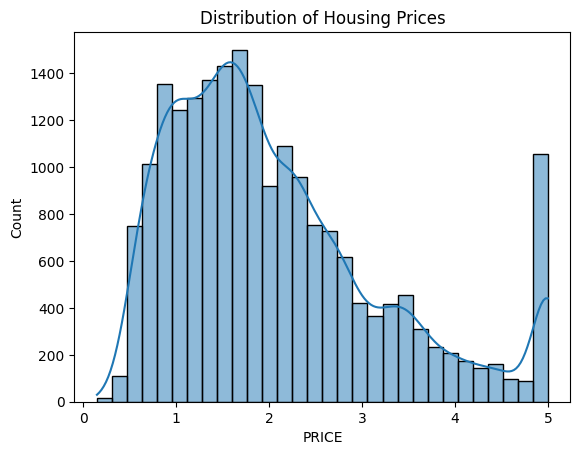

In [17]:
sns.histplot(df['PRICE'], bins=30, kde=True)
plt.title("Distribution of Housing Prices")
plt.show()

In [18]:
X = df.drop('PRICE', axis=1)
y = df['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [20]:
lr_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='r2')
rf_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)


print("Linear Regression R²:", lr_scores.mean())
print("Random Forest R²:", rf_scores.mean())

Linear Regression R²: 0.6114839952560999
Random Forest R²: 0.8041532509438764


In [21]:
y_pred_rf = rf.predict(X_test)
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest R²:", r2_score(y_test, y_pred_rf))

Random Forest MSE: 0.2553684927247781
Random Forest R²: 0.8051230593157366


In [22]:
with open("model.pkl", "wb") as f:
    pickle.dump(rf, f)

print("✅ Model and dataset saved: model.pkl & boston.csv")

✅ Model and dataset saved: model.pkl & boston.csv
